## **Classification Metrics (Binary)**

### 1. **Confusion Matrix**

A **Confusion Matrix** is a summary of prediction results that compares the actual (true) labels to the predicted labels made by a classifier. It provides insights into the number of true positives, false positives, true negatives, and false negatives.

|                   | **Predicted Positive** | **Predicted Negative** |
|-------------------|------------------------|------------------------|
| **True Positive**  | **TP**                 | **FN**                 |
| **True Negative**  | **FP**                 | **TN**                 |

Where:
- **TP** = True Positives (truely predicted positive cases),
- **FP** = False Positives (falsely predicted positive cases),
- **FN** = False Negatives (falsely predicted negative cases),
- **TN** = True Negatives (truely predicted negative cases).

This matrix helps in calculating other metrics like accuracy, precision, recall, F1-score, and specificity.

---

### 2. **Accuracy**

**Accuracy** measures the percentage of correct predictions out of all predictions.

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Where:
- **TP** = True Positives,
- **TN** = True Negatives,
- **FP** = False Positives,
- **FN** = False Negatives.

---

### 3. **Precision**

**Precision** measures the proportion of true positive predictions out of all positive predictions (i.e., how many selected items are relevant).

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

It is useful when the cost of false positives is high (e.g., in spam detection).

---

### 4. **Recall (Sensitivity or True Positive Rate)**

**Recall** measures the proportion of actual positive cases that were correctly identified (i.e., how many relevant items are selected).

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

It is important when the cost of false negatives is high (e.g., in medical diagnosis).

---

### 5. **Specificity (True Negative Rate)**

**Specificity** measures the proportion of actual negative cases that were correctly identified. It is the complement of recall and focuses on the correct identification of negative cases.

$$
\text{Specificity} = \frac{TN}{TN + FP}
$$

Specificity is important in scenarios where false positives are costly, such as in medical tests.

---

### 6. **Balanced Accuracy**

**Balanced Accuracy** adjusts for class imbalance by averaging the accuracy for both the positive and negative classes.

$$
\text{Balanced Accuracy} = \frac{1}{2} \left( \frac{TP}{TP + FN} + \frac{TN}{TN + FP} \right)
$$

This is particularly useful when working with imbalanced datasets, as it gives equal weight to the positive and negative classes.

---

### 7. **F1-Score**

**F1-Score** is the harmonic mean of precision and recall, providing a single metric that balances both.

$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

F1-Score is useful when you need a balance between precision and recall.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

# Create a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, n_clusters_per_class=1, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use a simple model (e.g., Logistic Regression) for classification
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1]) # TN / (TN + FP)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Compile all metrics into a DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'Balanced Accuracy', 'F1 Score'],
    'Score': [accuracy, precision, recall, specificity, balanced_accuracy, f1]
})
# Convert metrics to percentages and round to 1 decimal place
metrics_df['Score'] = (metrics_df['Score'] * 100).round(1).astype(str) + '%'

metrics_df

,Metric,Score
0,Accuracy,89.0%
1,Precision,90.8%
2,Recall,86.5%
3,Specificity,90.8%
4,Balanced Accuracy,89.0%
5,F1 Score,88.6%


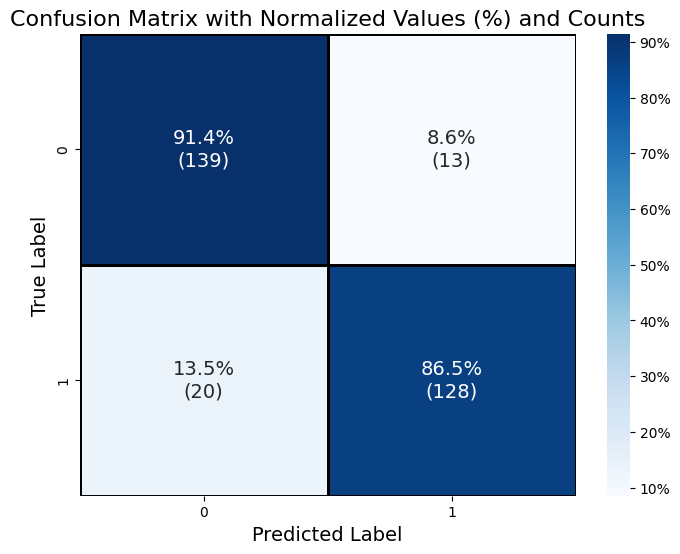

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Normalize the confusion matrix to show percentages
conf_matrix_normalized = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Re-plotting the heatmap with both raw counts and percentages in the annotations
plt.figure(figsize=(8, 6))

# Create a string formatter to add '%' symbol and raw counts to each value
annotations = np.array([f'{value:.1f}%\n({int(count)})' for value, count in zip(conf_matrix_normalized.flatten(), conf_matrix.flatten())]).reshape(2,2)

sns.heatmap(conf_matrix_normalized, annot=annotations, fmt='', cmap='Blues', cbar_kws={'format': '%.0f%%'},
            linewidths=1, linecolor='black', annot_kws={"size": 14})

# Set axis labels and title
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix with Normalized Values (%) and Counts', fontsize=16)

# Show the plot
plt.show()


#### 7. **ROC-AUC Score**

**ROC (Receiver Operating Characteristic)** curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold (probability threshold to output positive) is varied.

- **AUC (Area Under Curve)** is the area under the ROC curve and provides a single value to compare different models (a higher AUC means the model is more robust and its good performance does not vary a lot by changing the threshold).

The **True Positive Rate (TPR)** and **False Positive Rate (FPR)** are used to plot the ROC curve:

$$
\text{TPR} = \frac{TP}{TP + FN}, \quad \text{FPR} = \frac{FP}{FP + TN}
$$
<br>

A perfect model has an AUC of 1, while a random classifier has an AUC of 0.5 (assuming binary and balanced classes), because it represents the performance of a **random classifier**. Here's why:

##### 1. **Random Guessing**:
   - A **random classifier** does not have any discriminative ability; it essentially guesses the class label randomly, with a 50/50 chance for binary classification (assuming balanced classes).
   - This means that the classifier will predict positive and negative labels in a completely unstructured manner.

##### 2. **ROC Curve for a Random Classifier**:
   - A random classifier would have an equal chance of making correct and incorrect predictions, leading to a **True Positive Rate (TPR)** that is proportional to the **False Positive Rate (FPR)**.
   - In this case, the ROC curve is a diagonal line from the bottom-left (0, 0) to the top-right (1, 1), indicating that as the threshold changes, the TPR and FPR increase at the same rate. This is essentially a 50% chance of being correct.

##### 3. **AUC for a Random Classifier**:
   - The **AUC** measures the area under the ROC curve. For a random classifier, the ROC curve is the diagonal line, and the area under this line is exactly **0.5**.
   - An AUC of **0.5** implies that the model has no predictive ability; it is effectively guessing. This is the baseline for comparing other models.

##### Why Not Below 0.5?
- If a classifier has an **AUC below 0.5**, it means the model is worse than random guessing. In theory, a classifier with an AUC less than 0.5 can be inverted (flipping its predictions), and it would perform better than random guessing (yielding an AUC greater than 0.5).
- For example, an AUC of 0.3 means that the classifier systematically predicts incorrectly more often than not. You could swap the predictions (i.e., predict positive where the model predicts negative, and vice versa), and you would get an AUC of **1 - 0.3 = 0.7**, which would indicate a better performance.

##### AUC and Model Performance:
- **AUC = 0.5**: The model has no discriminative ability (random guessing).
- **AUC < 0.5**: The model is worse than random guessing and can be improved by inverting predictions.
- **AUC > 0.5**: The model is better than random guessing, with higher values indicating better performance.
- **AUC = 1.0**: A perfect classifier, with no false positives and no false negatives.

In summary, the minimum AUC of **0.5** reflects the performance of a random classifier because it cannot do any better than randomly guessing the outcomes of positive or negative classes. This is the baseline against which the discriminative ability of other models is measured.

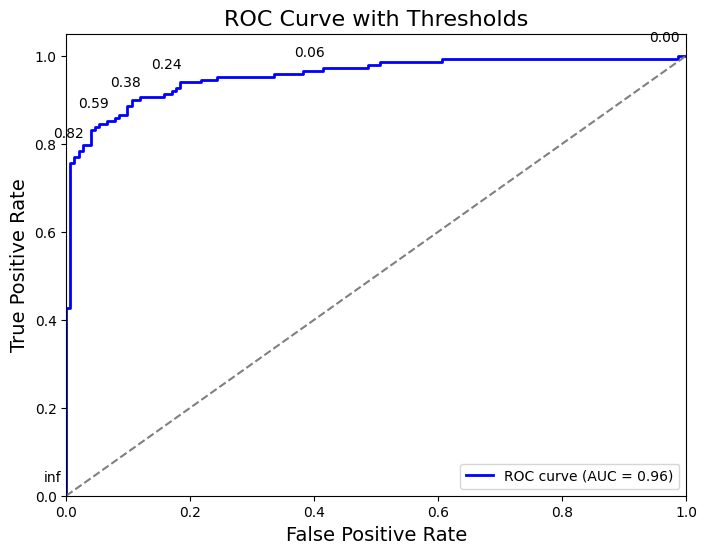

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]  # probabilities for the positive class

# Compute ROC curve values: FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line representing random guessing

# Annotate specific thresholds
for i, thr in enumerate(thresholds):
    if i % 9 == 0:  # to avoid overcrowding, you can plot every nth threshold
        plt.annotate(f'{thr:.2f}', (fpr[i], tpr[i]), textcoords="offset points", xytext=(-10,10), ha='center')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve with Thresholds', fontsize=16)
plt.legend(loc="lower right")
plt.show()


#### 8. **Precision-Recall Curve (PR-curve)**

The **Precision-Recall Curve (PR-curve)** is a graphical representation that shows the trade-off between **precision** and **recall** for different threshold values in a classification model, particularly useful when dealing with **imbalanced datasets**. Here’s a detailed explanation:



### What the PR-Curve Shows:
- The **Precision-Recall Curve** plots **precision** on the Y-axis and **recall** on the X-axis for different threshold values.
- As the threshold for classifying an instance as positive changes, the values of precision and recall will change.
  - When the threshold is lowered, more instances are classified as positive, leading to higher recall but often lower precision because of more false positives.
  - When the threshold is raised, fewer instances are classified as positive, leading to higher precision but lower recall.

### Why the PR-Curve is Useful:
- **Imbalanced Datasets**: The PR-curve is particularly valuable when dealing with imbalanced datasets where the number of positive instances is much smaller than the negative instances. In such cases, **accuracy** and even the **ROC curve** can be misleading.
  - For example, in a dataset where 95% of the data is negative, a classifier can achieve high accuracy by predicting everything as negative. However, the PR-curve focuses on the performance for the minority class (positive class).
  
- **Trade-off between Precision and Recall**: It shows how well the model performs in balancing precision and recall, which is crucial in scenarios where you need to optimize one over the other. For instance:
  - In **spam detection**, you might want higher precision (to avoid labeling legitimate emails as spam).
  - In **medical diagnostics**, you might prioritize recall (to minimize false negatives and ensure sick patients are identified).

### Interpretation of the PR-Curve:
- A good model will maintain high precision while recall increases, meaning the curve will be pushed towards the top-right corner.
- A **baseline** model would produce a horizontal line representing the proportion of positive examples in the dataset. If your model’s PR curve is above this line, it is performing better than random guessing.

### Comparison with the ROC Curve:
- **ROC Curve**: The ROC curve plots **True Positive Rate (TPR)** (recall) against **False Positive Rate (FPR)**, and it’s useful when you care about both classes equally. However, the ROC curve can be misleading when classes are highly imbalanced because it includes FPR, which is not very informative when negatives dominate the dataset.
  
- **PR Curve**: The PR-curve only focuses on the positive class, and it is more informative than the ROC curve in scenarios where:
  - You are working with imbalanced data.
  - You care more about the performance of the positive class (e.g., fraud detection, rare disease detection).
  
### Area Under the PR-Curve (AUC-PR):
- Similar to the ROC curve, the **Area Under the Precision-Recall Curve (AUC-PR)** can be used to summarize the model’s performance.
  - **AUC-PR = 1.0**: Perfect classifier (high precision and recall at all thresholds).
  - **AUC-PR near 0**: Poor classifier.
  - **AUC-PR closer to the baseline**: Indicates a model that is close to random guessing.

### Example:
In a dataset where you are detecting fraudulent transactions (rare positives), the PR curve can tell you how much you will sacrifice in precision as you increase recall. This trade-off is critical because in such a case, you may want to balance precision and recall differently depending on the application (e.g., minimizing false positives vs. catching as many fraud cases as possible).

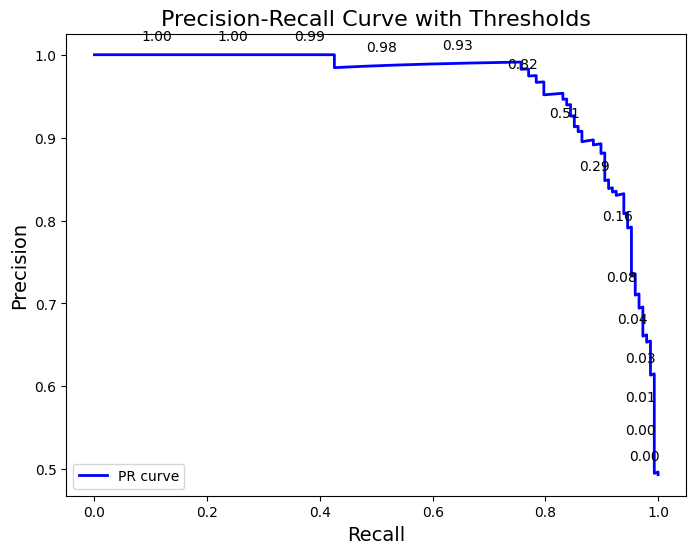

In [ ]:
from sklearn.metrics import precision_recall_curve

# Calculate precision, recall, and thresholds for PR curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plotting the PR curve with threshold annotations
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='PR curve')

# Annotate specific thresholds on the PR curve
for i, thr in enumerate(pr_thresholds):
    if i % 20 == 0:  # to avoid overcrowding, annotate every nth threshold
        plt.annotate(f'{thr:.2f}', (recall[i], precision[i]), textcoords="offset points", xytext=(-10,10), ha='center')

plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve with Thresholds', fontsize=16)
plt.legend(loc="lower left")

# Show the plot
plt.show()



### Question: What is the Baseline in a PR Curve?

### What is Log-Loss?

**Log-Loss**, also known as **Logarithmic Loss** or **Binary Cross-Entropy**, is a performance metric that evaluates the accuracy of probabilistic predictions for a binary classification model. Unlike simpler metrics like accuracy, log-loss takes into account the predicted probability of each class and penalizes incorrect classifications more harshly.

The formula for log-loss is:

$$
\text{Log-Loss} = - \frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
$$

Where:
- $(n)$ is the number of data points.
- $(y_i)$ is the actual label (0 or 1).
- $(p_i)$ is the predicted probability for the positive class (between 0 and 1).

### Key Points:
- **Log-Loss** measures how well a model’s predicted probabilities match the actual outcomes.
- **Lower log-loss** values are better, as it indicates that the predicted probabilities are closer to the true labels.
  - **Log-Loss = 0**: Perfect predictions (the model predicts 1 with 100% certainty when the true label is 1, and similarly for 0).
  - **Log-Loss approaches infinity**: The model is confidently wrong (e.g., predicting a probability of 1 when the true label is 0).

### Why Log-Loss is Important:

1. **Probabilistic Predictions**:
   - Unlike accuracy, precision, or recall, which only evaluate hard class predictions (0 or 1), log-loss evaluates the **quality of the predicted probabilities**.
   - In many real-world applications, knowing the probability of an event is just as important as the predicted class. For example, in medical diagnostics or financial risk assessments, you may want to understand the confidence level of predictions (e.g., 80% chance of a disease vs. 55% chance).

2. **Capturing Confidence**:
   - Log-loss penalizes **overconfident wrong predictions** much more heavily than predictions that are closer to the correct probability. For example:
     - Predicting 0.99 when the true label is 1 leads to a small penalty.
     - Predicting 0.01 when the true label is 1 leads to a much larger penalty.
   - This characteristic encourages models to be cautious and avoid making extremely confident incorrect predictions.

3. **Handling Imbalanced Classes**:
   - In **imbalanced datasets**, accuracy can be misleading because a model might perform well by always predicting the majority class. However, log-loss takes into account the confidence of the model's predictions, providing a more nuanced assessment of performance, especially for the minority class.

4. **Continuous Evaluation**:
   - Since log-loss evaluates the predicted probabilities rather than the final binary classification, it provides more detailed feedback during model training. It can guide model tuning by revealing how confident and correct the model is on average.

5. **Penalizes Misclassification**:
   - Log-loss penalizes false predictions more harshly than correct predictions. If a model is unsure about a prediction (e.g., predicting a probability close to 0.5), the penalty is less severe compared to confidently making an incorrect prediction.

### Example:
Consider a binary classification task, and you have the following predictions:

| Actual | Predicted Probability |
|--------|-----------------------|
| 1      | 0.9                   |
| 0      | 0.2                   |
| 1      | 0.6                   |
| 0      | 0.8                   |

- For the first prediction, the model is confident (0.9) and correct, so the log-loss will be small.
- For the last prediction, the model is confident but wrong (0.8 when the true label is 0), so the log-loss will be large.

This shows how log-loss differentiates between predictions that are confident and wrong versus predictions that are uncertain.

### Why is Log-Loss Preferable in Some Cases?

- **Probability-Sensitive**: Log-loss cares about how confident the model is in its predictions, which is crucial when working with probabilistic predictions. For instance, if you want your model to provide insights into how likely a certain event is (e.g., fraud detection, medical diagnosis), log-loss will penalize overconfidence in wrong predictions.
  
- **Model Calibration**: Log-loss helps in assessing how well-calibrated a model is. A well-calibrated model will output probabilities that reflect the true likelihood of events. For example, if a model predicts a 0.7 probability for 100 events, about 70 of those events should be positive.

### When to Use Log-Loss:

- **Classification problems with imbalanced data** where you need to account for the confidence of predictions.
- **Applications requiring probabilistic predictions** rather than hard classifications, such as financial risk models, medical diagnosis, or weather prediction.
- **When you need a metric that penalizes confident misclassifications**, which encourages models to be careful when predicting probabilities.

In summary, **log-loss** is important because it evaluates the quality of probabilistic predictions and penalizes overconfident wrong predictions, providing a more nuanced and useful measure for tasks where understanding prediction probabilities is critical.

In [ ]:
from sklearn.metrics import log_loss

# Calculate log-loss
log_loss_value = log_loss(y_test, y_pred_prob)

log_loss_value


0.2708509382149536

# Imbalanced Data (For You)

In [ ]:
# Create an imbalanced synthetic binary classification dataset (positive is minority)
X_imbalanced, y_imbalanced = make_classification(n_samples=1000, n_features=20, n_classes=2,
                                                 n_clusters_per_class=1, weights=[0.95, 0.05],
                                                 flip_y=0, random_state=42)

# Split the dataset into training and test sets
X_train_imbalanced, X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(
    X_imbalanced, y_imbalanced, test_size=0.3, random_state=42)

# Train the same Logistic Regression model
model_imbalanced = LogisticRegression(random_state=42)
model_imbalanced.fit(X_train_imbalanced, y_train_imbalanced)
y_pred_imbalanced = model_imbalanced.predict(X_test_imbalanced)

# Calculate confusion matrix
conf_matrix_imbalanced = confusion_matrix(y_test_imbalanced, y_pred_imbalanced)

# Calculate classification metrics
accuracy_imbalanced = accuracy_score(y_test_imbalanced, y_pred_imbalanced)
precision_imbalanced = precision_score(y_test_imbalanced, y_pred_imbalanced)
recall_imbalanced = recall_score(y_test_imbalanced, y_pred_imbalanced)
specificity_imbalanced = conf_matrix_imbalanced[1, 1] / (conf_matrix_imbalanced[1, 1] + conf_matrix_imbalanced[0, 1]) # TN / (TN + FP)
balanced_accuracy_imbalanced = balanced_accuracy_score(y_test_imbalanced, y_pred_imbalanced)
f1_imbalanced = f1_score(y_test_imbalanced, y_pred_imbalanced)

# Compile all metrics into a DataFrame
metrics_df_imbalanced = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'Balanced Accuracy', 'F1 Score'],
    'Score': [accuracy_imbalanced, precision_imbalanced, recall_imbalanced, specificity_imbalanced,
              balanced_accuracy_imbalanced, f1_imbalanced]
})

# Convert metrics to percentages and round to 1 decimal place
metrics_df_imbalanced['Score'] = (metrics_df_imbalanced['Score'] * 100).round(1).astype(str) + '%'


metrics_df_imbalanced


,Metric,Score
0,Accuracy,98.0%
1,Precision,100.0%
2,Recall,62.5%
3,Specificity,100.0%
4,Balanced Accuracy,81.2%
5,F1 Score,76.9%


## What happened?
In the case of the imbalanced dataset, the metrics show a significant disparity between **accuracy** and **balanced accuracy**, which highlights the limitations of accuracy in imbalanced classification problems.

### Key Insights:

1. **Accuracy (98%)**:
   - Accuracy is high because the model correctly predicted the majority class (negative class, 90% of the data). Since most instances belong to this class, simply predicting the majority class results in a high overall accuracy.
   - However, this is misleading because the model's performance on the minority class (positive cases) is poor, which is not captured by the high accuracy value.

2. **Precision (100%)**:
   - Precision is perfect because every instance that the model predicted as positive was actually positive (no false positives). This is typical in imbalanced datasets when the model is conservative in predicting the minority class, but this doesn't mean the model is good at finding all positives.

3. **Recall (62.5%)**:
   - Recall is significantly lower because the model missed 23.3% of the true positives (positive cases). This indicates that while the model is highly precise, it is less sensitive to the minority class, meaning it fails to identify many true positives.

4. **Specificity (100%)**:
   - Specificity is high because the model correctly identified nearly all negative instances (the majority class). This metric alone can be misleading in imbalanced datasets, as it only focuses on the majority class.

5. **Balanced Accuracy (81.2%)**:
   - Balanced accuracy takes into account both the recall for the positive class and the specificity for the negative class, providing a more realistic measure in imbalanced scenarios. It averages the recall for both classes, thus correcting the bias seen in regular accuracy.

6. **F1 Score (76.9%)**:
   - F1 Score balances both precision and recall. The relatively lower F1 score compared to accuracy shows that the model is not performing as well when balancing the minority class, despite having perfect precision.

### Why This Happened:

- **Imbalanced Dataset**: In this case, 95% of the data belongs to the negative class and only 5% to the positive class. The model tends to be biased towards predicting the majority class because it's much more frequent, which inflates accuracy.
- **Accuracy's Limitation**: Since the model can achieve high accuracy by just predicting the majority class, it can easily ignore the minority class without significantly affecting the overall accuracy score. This leads to high accuracy but poor performance for the minority class.
- **Importance of Balanced Accuracy**: Balanced accuracy accounts for the imbalanced nature by averaging the recall of both classes, thus giving a clearer picture of the model's true performance. It penalizes the model for not identifying the minority class well, which regular accuracy does not.

In imbalanced datasets, metrics like **balanced accuracy**, **recall**, and **F1 score** provide a better evaluation of model performance than plain accuracy, which can be misleading.


# **Classification Metrics (Multiclass)**

### 1. **Confusion Matrix (Multiclass)**

In a **multiclass confusion matrix**, the rows represent the actual classes, and the columns represent the predicted classes. Instead of just two classes (positive and negative), each class has its own row and column.

|                   | **Predicted Class 1** | **Predicted Class 2** | **...** | **Predicted Class N** |
|-------------------|-----------------------|-----------------------|--------|-----------------------|
| **True Class 1**   | **TP for Class 1**    | **FP for Class 1**     | ...    |                       |
| **True Class 2**   | **FN for Class 2**    | **TP for Class 2**     | ...    |                       |
| **...**           |                       |                       | ...    |                       |
| **True Class N**   |                       |                       |        | **TP for Class N**    |

- **True Positives (TP)**: Correctly predicted instances for each class.
- **False Positives (FP)**: Instances incorrectly predicted as a particular class.
- **False Negatives (FN)**: Instances of a class that were incorrectly predicted as another class.
- **True Negatives (TN)** are generally calculated for each class by summing all the instances not in that class.

This matrix helps in calculating other multiclass metrics like precision, recall, F1-score, and accuracy.

---

### 2. **Accuracy (Multiclass)**

In the multiclass case, **accuracy** still measures the proportion of correct predictions out of all predictions, regardless of the class.

$$
\text{Accuracy} = \frac{\text{Total Correct Predictions}}{\text{Total Predictions}}
$$

Where **Total Correct Predictions** is the sum of the diagonal elements of the confusion matrix (all true positives).

---

### 3. **Precision (Multiclass)**

For multiclass problems, **precision** can be calculated in three ways:

- **Macro-averaged Precision**: Precision is calculated for each class separately and then averaged equally, treating all classes equally.
  
  $$
  \text{Macro Precision} = \frac{1}{N} \sum_{i=1}^{N} \frac{TP_i}{TP_i + FP_i}
  $$

- **Weighted Precision**: Precision is calculated for each class and then weighted by the number of true instances in each class to account for class imbalance.
  
  $$
  \text{Weighted Precision} = \sum_{i=1}^{N} \frac{n_i}{n} \cdot \frac{TP_i}{TP_i + FP_i}
  $$

- **Micro-averaged Precision**: Treats all classes as a single binary classification problem by summing the **TP**, **FP**, and **FN** across all classes:
  
  $$
  \text{Micro Precision} = \frac{\sum TP}{\sum (TP + FP)}
  $$

---

### 4. **Recall (Sensitivity or True Positive Rate) (Multiclass)**

Similarly, recall can be computed in three ways:

- **Macro-averaged Recall**: Calculated by averaging the recall for each class equally:
  
  $$
  \text{Macro Recall} = \frac{1}{N} \sum_{i=1}^{N} \frac{TP_i}{TP_i + FN_i}
  $$

- **Weighted Recall**: Adjusts for the number of true instances in each class:
  
  $$
  \text{Weighted Recall} = \sum_{i=1}^{N} \frac{n_i}{n} \cdot \frac{TP_i}{TP_i + FN_i}
  $$

- **Micro-averaged Recall**: Treats all classes as a single binary classification problem by summing the **TP**, **FP**, and **FN** across all classes:
  
  $$
  \text{Micro Recall} = \frac{\sum TP}{\sum (TP + FN)}
  $$

---

### 5. **Specificity (True Negative Rate) (Multiclass)**

For multiclass classification, **specificity** is calculated for each class by treating it as a binary classification (this class vs. all others):

$$
\text{Specificity for Class i} = \frac{TN_i}{TN_i + FP_i}
$$

Similar to precision and recall, you can compute **macro-averaged specificity** (equal weight for each class) or **weighted specificity** (weighted by class size).

---

### 6. **Balanced Accuracy (Multiclass)**

**Balanced Accuracy** is particularly useful for imbalanced datasets in multiclass problems. It is calculated by averaging the recall (sensitivity) for each class, giving equal importance to each class, regardless of class size.

#### **Unweighted Balanced Accuracy**:

$$
\text{Balanced Accuracy} = \frac{1}{N} \sum_{i=1}^{N} \frac{TP_i}{TP_i + FN_i}
$$

Where:
- $ N $ is the total number of classes.
- $ TP_i $ is the number of true positives for class $ i $.
- $ FN_i $ is the number of false negatives for class $ i $.

---

#### **Weighted Balanced Accuracy**:


$$ {Weighted Balanced Accuracy} = \sum_{i=1}^{N} w_i \cdot \frac{TP_i}{TP_i + FN_i}
$$

Where:
- $ w_i $ is the weight for class $ i $, which is proportional to the number of true samples in class $ i $:
  $$
  w_i = \frac{n_i}{n}
  $$
  Where $ n_i $ is the number of true instances of class $ i $, and $ n $ is the total number of instances across all classes.


---

### 7. **F1-Score (Multiclass)**

The **F1-Score** can be computed in three ways:

- **Macro F1-Score**: The F1-score is calculated for each class separately, and the results are averaged equally.
  
  $$
  \text{Macro F1} = \frac{1}{N} \sum_{i=1}^{N} \frac{2 \cdot \text{Precision}_i \cdot \text{Recall}_i}{\text{Precision}_i + \text{Recall}_i}
  $$

- **Weighted F1-Score**: Similar to precision and recall, it weighs the F1 score for each class based on the number of true instances in that class:
  
  $$
  \text{Weighted F1} = \sum_{i=1}^{N} \frac{n_i}{n} \cdot \frac{2 \cdot \text{Precision}_i \cdot \text{Recall}_i}{\text{Precision}_i + \text{Recall}_i}
  $$

- **Micro-averaged F1-Score**: In this case, micro-averaged precision and recall are used to compute a single F1-score across all classes. Since micro-averaging sums up the **TP**, **FP**, and **FN** globally, the **micro F1** is also computed globally:
  
  $$
  \text{Micro F1} = \frac{2 \times \text{Micro Precision} \times \text{Micro Recall}}{\text{Micro Precision} + \text{Micro Recall}}
  $$

---

### Summary of Averages:

- **Macro**: Treats each class equally and averages metrics across classes.
- **Weighted**: Weighs each class's contribution based on its size.
- **Micro**: Sums up the true positives, false positives, and false negatives globally across all classes and treats the problem as a single binary classification.

These approaches provide flexibility when evaluating multiclass classifiers, allowing you to emphasize overall performance (micro), treat all classes equally (macro), or account for class imbalance (weighted).

### 8. **ROC-AUC for Multiclass**

In the multiclass setting, **ROC-AUC** can be computed by considering each class against all other classes (one-vs-rest approach). For each class $i$, we compute the ROC curve, treating class $i$ as the positive class and all others as the negative class.

The overall **multiclass AUC** can then be calculated by averaging the AUC scores for all classes.

For each class $i$, the **True Positive Rate (TPR)** and **False Positive Rate (FPR)** are defined as:

$$
\text{TPR}_i = \frac{TP_i}{TP_i + FN_i}, \quad \text{FPR}_i = \frac{FP_i}{FP_i + TN_i}
$$

The **ROC-AUC** is then computed as the area under the ROC curve for each class, and the average AUC can be taken across all classes.

# Multi-class Classification (For You)

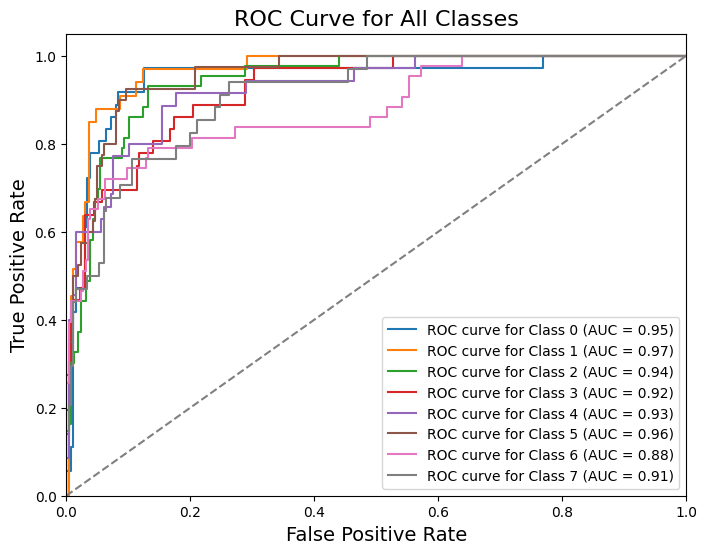

,Metric,Score
0,Accuracy,65.3%
1,Macro Precision,65.6%
2,Micro Precision,65.3%
3,Weighted Precision,65.6%
4,Macro Recall,65.8%
5,Micro Recall,65.3%
6,Weighted Recall,65.3%
7,Macro F1,65.1%
8,Micro F1,65.3%
9,Weighted F1,64.9%


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc, balanced_accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import pandas as pd

# Step 1: Create synthetic multiclass dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=8, n_informative=5, n_clusters_per_class=1, random_state=42)

# Step 2: Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train an SVC model
model = SVC(probability=True, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict
y_pred = model.predict(X_test)

# Step 5: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 6: Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Step 7: Precision, Recall, F1 (Macro, Micro, Weighted)
macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
weighted_precision, weighted_recall, weighted_f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Step 8: Specificity Calculation
TN = conf_matrix.sum(axis=1) - conf_matrix.diagonal()  # Summing across columns and subtracting diagonal (TPs)
FP = conf_matrix.sum(axis=0) - conf_matrix.diagonal()  # Summing across rows and subtracting diagonal
FN = conf_matrix.sum(axis=1) - conf_matrix.diagonal()  # Summing across columns and subtracting diagonal
TP = conf_matrix.diagonal()
specificity = TN / (TN + FP)

# Step 9: Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Step 10: ROC Curve (automatic class detection)
n_classes = len(np.unique(y_test))  # Detect number of classes
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
y_pred_prob = model.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for all classes with legends
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve for Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve for All Classes', fontsize=16)
plt.legend(loc="lower right")
plt.show()

# Print Results in a DataFrame
metrics_df = {
    'Metric': ['Accuracy', 'Macro Precision', 'Micro Precision', 'Weighted Precision',
               'Macro Recall', 'Micro Recall', 'Weighted Recall',
               'Macro F1', 'Micro F1', 'Weighted F1', 'Balanced Accuracy'],
    'Score': [accuracy, macro_precision, micro_precision, weighted_precision,
              macro_recall, micro_recall, weighted_recall,
              macro_f1, micro_f1, weighted_f1, balanced_acc]
}

df_metrics = pd.DataFrame(metrics_df)

df_metrics['Score'] = (df_metrics['Score'] * 100).round(1).astype(str) + '%'

df_metrics

# Cross Validation

In [ ]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc, balanced_accuracy_score
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import pandas as pd

# Create synthetic multiclass dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=5, n_informative=5, n_clusters_per_class=2, random_state=42)

# Initialize regular cross-validation (not stratified)
n_classes = len(np.unique(y))
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Variables to accumulate results across folds
all_conf_matrices = []
all_roc_auc = []
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []
balanced_acc_scores = []

# Cross-validation loop
for train_index, test_index in kf.split(X, y):
    # Split the data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model = SVC(probability=True, random_state=42)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Precision, Recall, F1 (Macro)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Balanced Accuracy
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    balanced_acc_scores.append(balanced_acc)

    # ROC Curve and AUC
    y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
    y_pred_prob = model.predict_proba(X_test)

# Aggregate Results
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_balanced_acc = np.mean(balanced_acc_scores)

std_accuracy = np.std(accuracy_scores)
std_precision = np.std(precision_scores)
std_recall = np.std(recall_scores)
std_f1 = np.std(f1_scores)
std_balanced_acc = np.std(balanced_acc_scores)

# Display aggregated metrics with mean and standard deviation in formatted style
metrics_df = {
    'Metric': ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1 (Macro)', 'Balanced Accuracy'],
    'Score': [f"{(avg_accuracy * 100):.1f}% ± {(std_accuracy * 100):.1f}%",
              f"{(avg_precision * 100):.1f}% ± {(std_precision * 100):.1f}%",
              f"{(avg_recall * 100):.1f}% ± {(std_recall * 100):.1f}%",
              f"{(avg_f1 * 100):.1f}% ± {(std_f1 * 100):.1f}%",
              f"{(avg_balanced_acc * 100):.1f}% ± {(std_balanced_acc * 100):.1f}%"]
}

# Convert to DataFrame
df_metrics = pd.DataFrame(metrics_df)

df_metrics

,Metric,Score
0,Accuracy,71.5% ± 4.7%
1,Precision (Macro),71.9% ± 4.4%
2,Recall (Macro),71.4% ± 4.4%
3,F1 (Macro),71.1% ± 4.6%
4,Balanced Accuracy,71.4% ± 4.4%


# Excercise!

Make a synthetic **imbalanced**, **multi-class**, dataset. <br>
Perform cross validation and see the results (micro, macro, weighted). <br>
What could go wrong in this scenario?

- Check stratified cross validation and once again do it with stratified CV.